In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('class A.csv')


In [3]:
df.head()


,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.14,0,0.43,2,238,3,0,0,hr,low
1,0.10,1,0.55,2,247,4,0,0,sales,medium
2,0.10,1,0.55,2,247,4,0,0,sales,medium
3,0.10,1,0.55,2,247,4,0,0,sales,medium
4,0.21,0,0.43,2,249,3,0,0,marketing,low


In [4]:
#check for any missing values 
df.isnull().any()


satisfaction_level       False
left                     False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
#Rename Columns for better readability 
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'Churn'
                        })

In [6]:
df = df.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [7]:
df.head()


,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,0.14,0,0.43,2,238,3,0,0,hr,low
1,0.10,1,0.55,2,247,4,0,0,sales,medium
2,0.10,1,0.55,2,247,4,0,0,sales,medium
3,0.10,1,0.55,2,247,4,0,0,sales,medium
4,0.21,0,0.43,2,249,3,0,0,marketing,low


In [8]:
df.dtypes


satisfaction           float64
Churn                    int64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department              object
salary                  object
dtype: object

In [9]:
#How many employees in the dataset ? 
df.shape

(3000, 10)

In [10]:
#rate of Churn of the company 
Churn_rate = df.Churn.value_counts()/df.shape[0]
Churn_rate


1    0.613
0    0.387
Name: Churn, dtype: float64

In [11]:

#Describe the Statistical overview of the employees 
df.describe()

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.0
mean,0.309750,0.613000,0.592067,3.185667,180.808667,3.519333,0.09600,0.0
std,0.121695,0.487145,0.141579,1.510173,54.086534,1.064896,0.29464,0.0
min,0.090000,0.000000,0.360000,2.000000,97.000000,2.000000,0.00000,0.0
25%,0.190000,0.000000,0.490000,2.000000,141.000000,3.000000,0.00000,0.0
50%,0.370000,1.000000,0.540000,2.000000,156.000000,3.000000,0.00000,0.0
75%,0.410000,1.000000,0.690000,4.000000,222.000000,4.000000,0.00000,0.0
max,0.500000,1.000000,1.000000,6.000000,310.000000,10.000000,1.00000,0.0


In [12]:
#Display the mean summary of Employees (Churn vs Non-Churn)
Churn_Summary = df.groupby('Churn')
Churn_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Churn,,,,,,,
0,0.254815,0.627201,3.835487,196.047373,3.982773,0.171404,0.0
1,0.344432,0.569886,2.775421,171.188146,3.226754,0.048396,0.0


In [13]:

#Create a Correlation matrix. To explain what features correlate the most with Churn, what other correlations can be found 
corr = df.corr()
corr

,satisfaction,Churn,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
satisfaction,1.000000,0.358736,-0.712097,-0.840686,-0.704157,-0.521424,-0.086466,NaN
Churn,0.358736,1.000000,-0.197208,-0.341951,-0.223901,-0.345847,-0.203376,NaN
evaluation,-0.712097,-0.197208,1.000000,0.595306,0.625477,0.366338,0.030333,NaN
projectCount,-0.840686,-0.341951,0.595306,1.000000,0.720856,0.444695,0.076084,NaN
averageMonthlyHours,-0.704157,-0.223901,0.625477,0.720856,1.000000,0.398381,0.049675,NaN
yearsAtCompany,-0.521424,-0.345847,0.366338,0.444695,0.398381,1.000000,0.083352,NaN
workAccident,-0.086466,-0.203376,0.030333,0.076084,0.049675,0.083352,1.000000,NaN
promotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

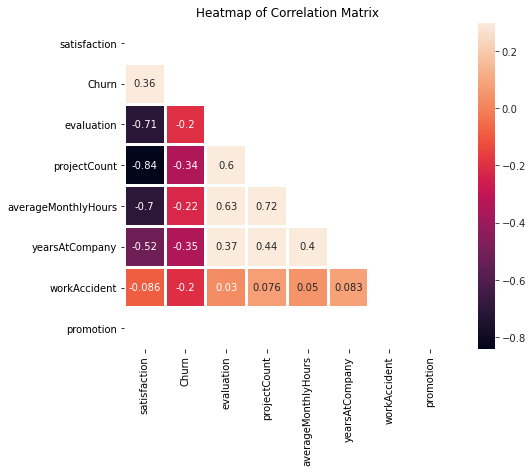

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, linewidths=2.0, ax=ax, mask=mask, vmax=.3, square=True, annot=True)
plt.title('Heatmap of Correlation Matrix')


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

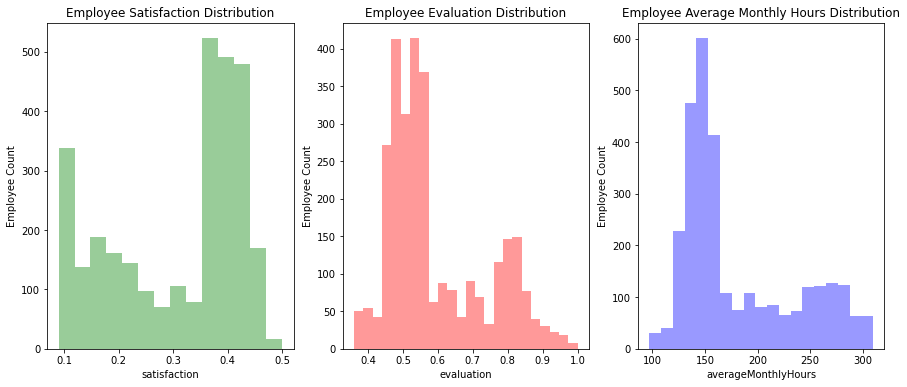

In [15]:
#setup the matplotlib
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Graph Employee Evaluation 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

In [16]:

cat_var = ['Department','salary','Churn','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()


,Churn,promotion,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.14,0.43,2,238,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.10,0.55,2,247,4,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.10,0.55,2,247,4,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0.10,0.55,2,247,4,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0.21,0.43,2,249,3,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [19]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores)



[0.89666667 0.98333333 0.97666667 0.99666667 0.94       0.99333333
 0.97666667 0.97666667 0.98666667 0.98666667]


In [20]:
print(scores.mean())

0.9713333333333333
